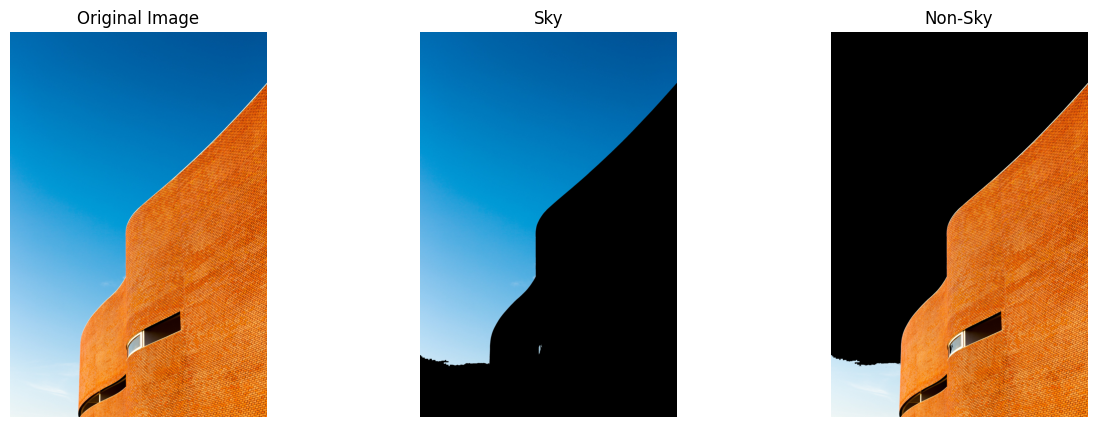

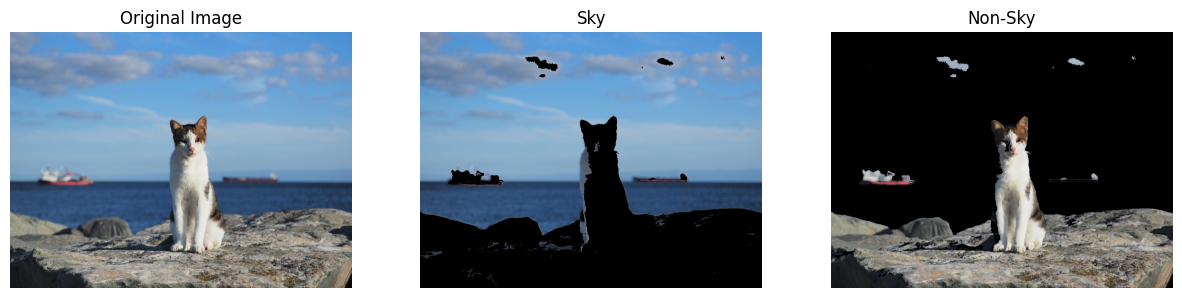

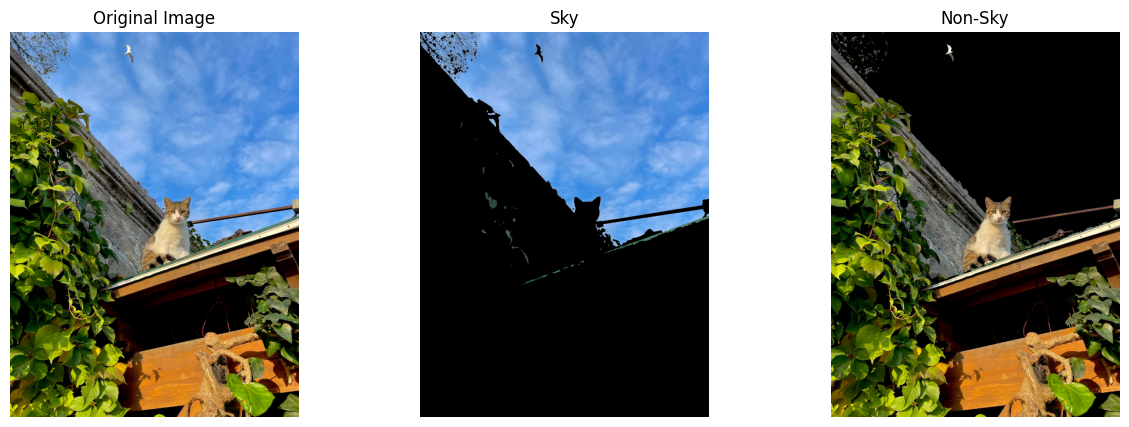

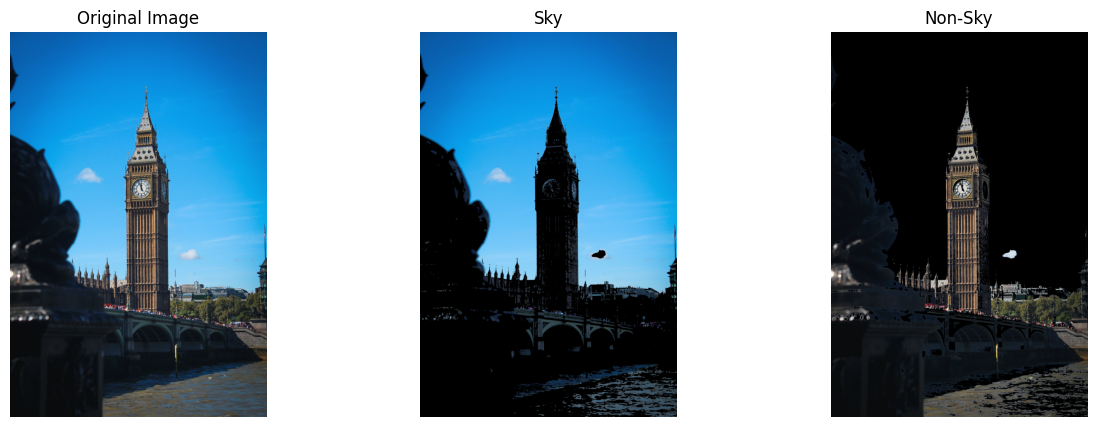

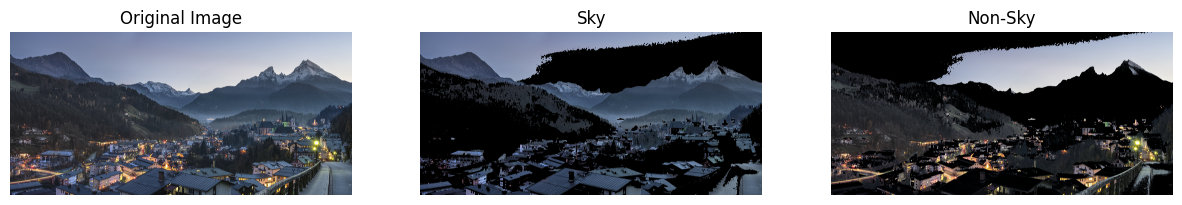

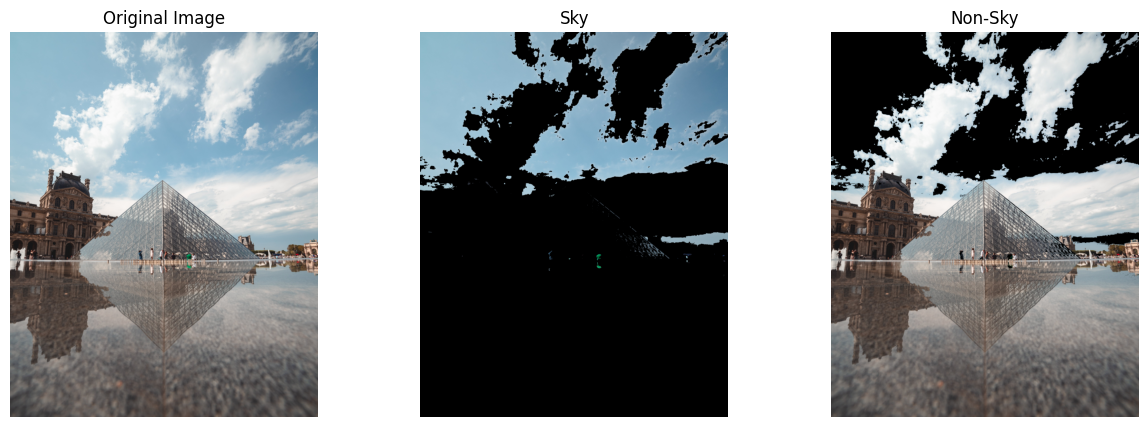

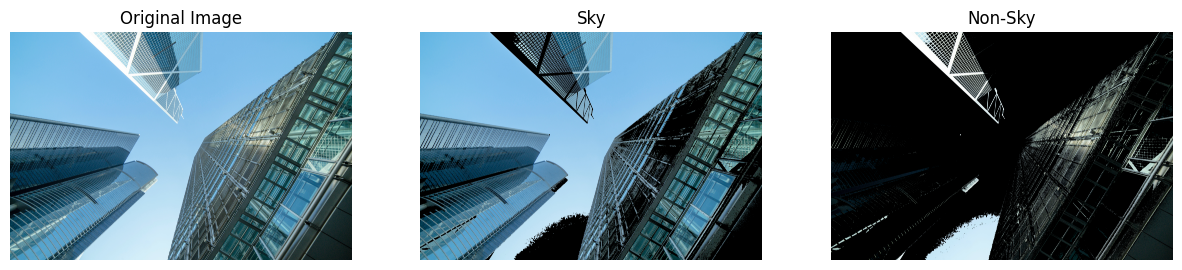

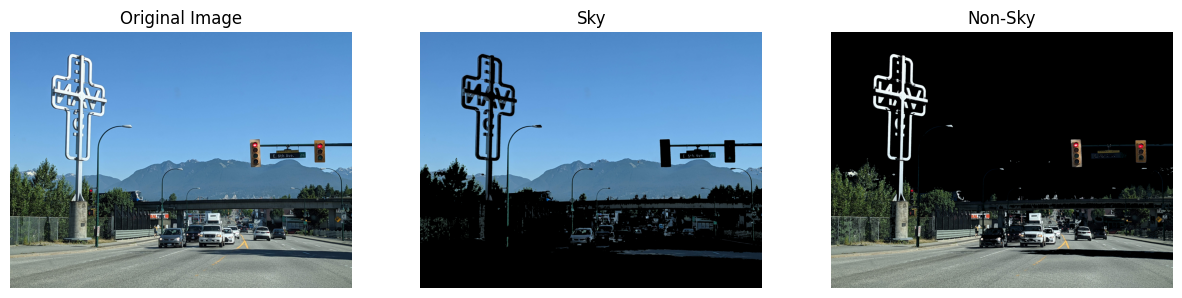

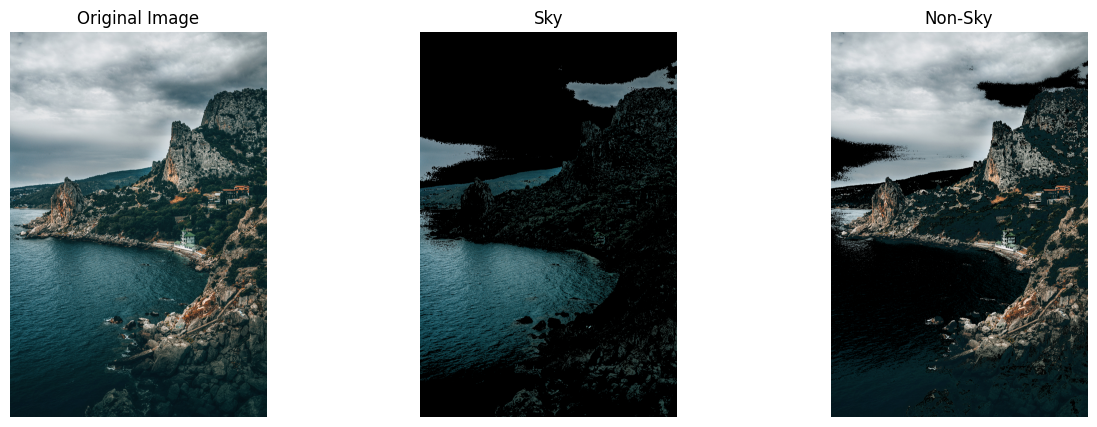

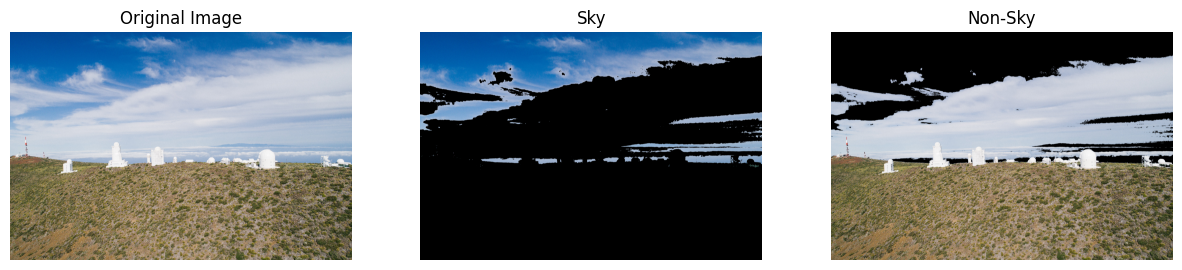

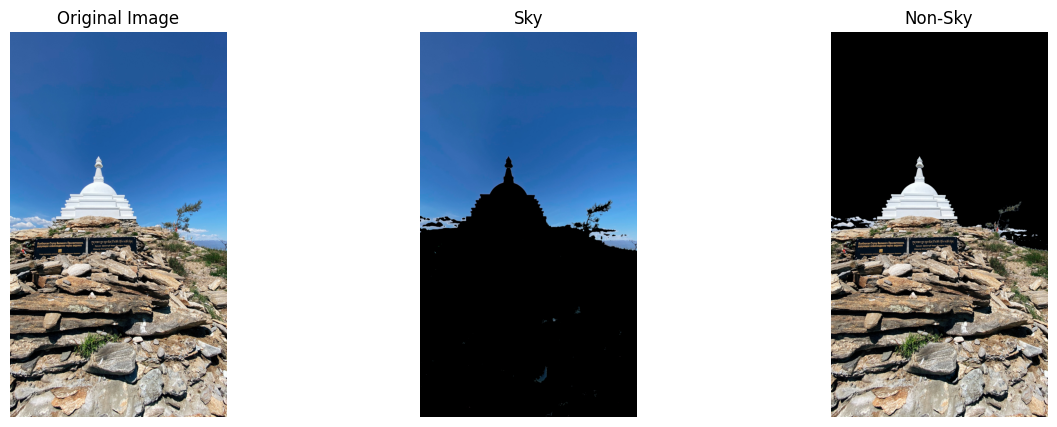

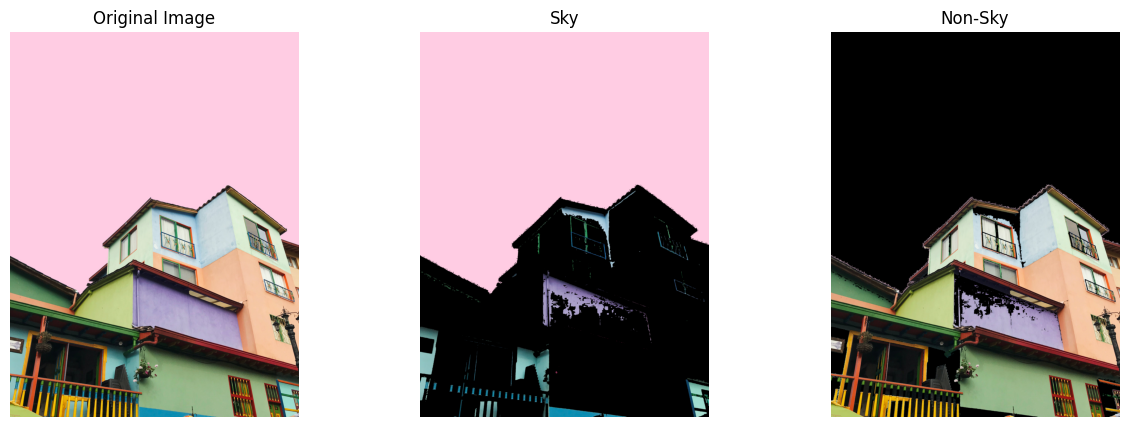

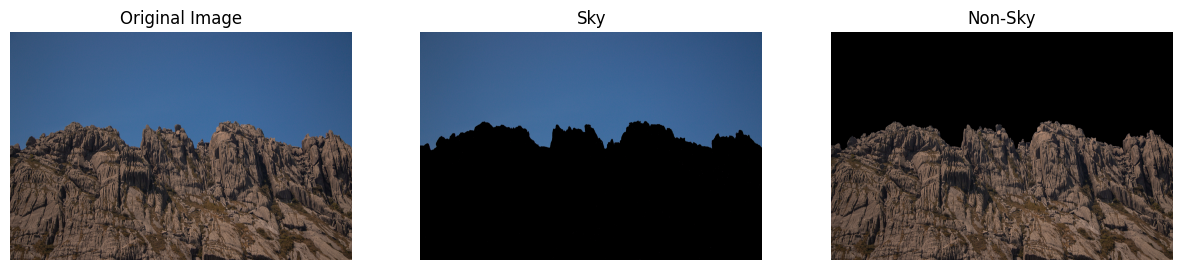

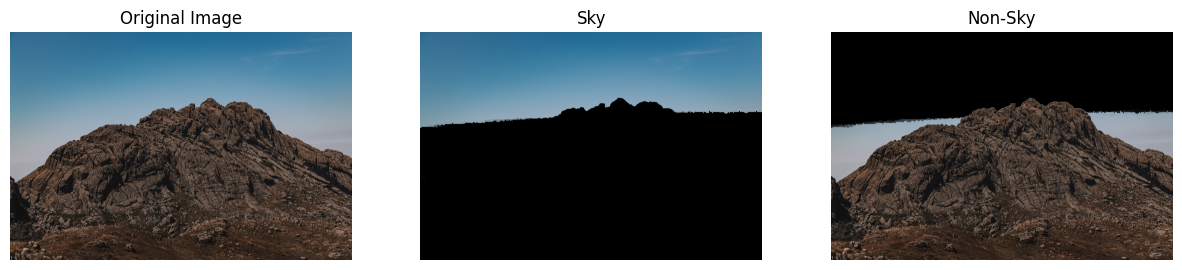

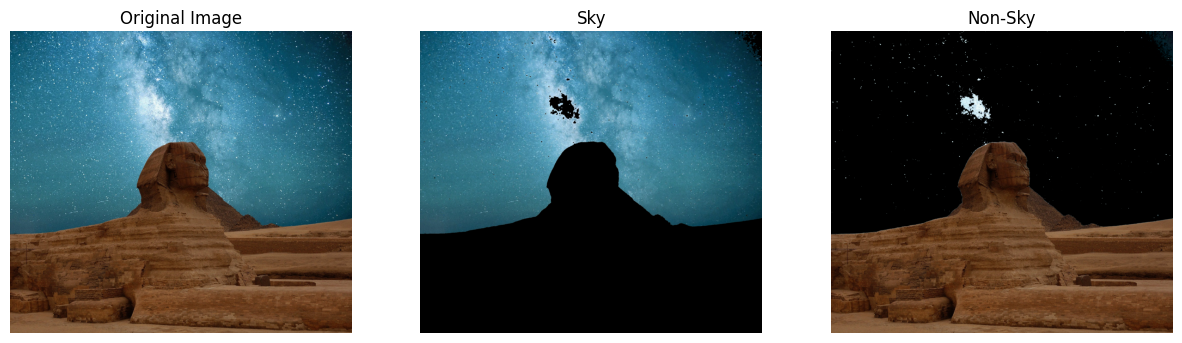

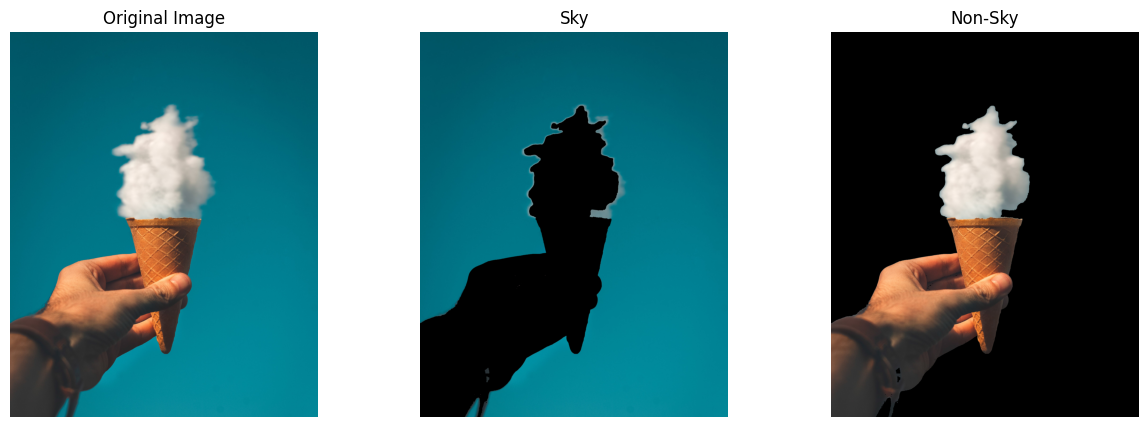

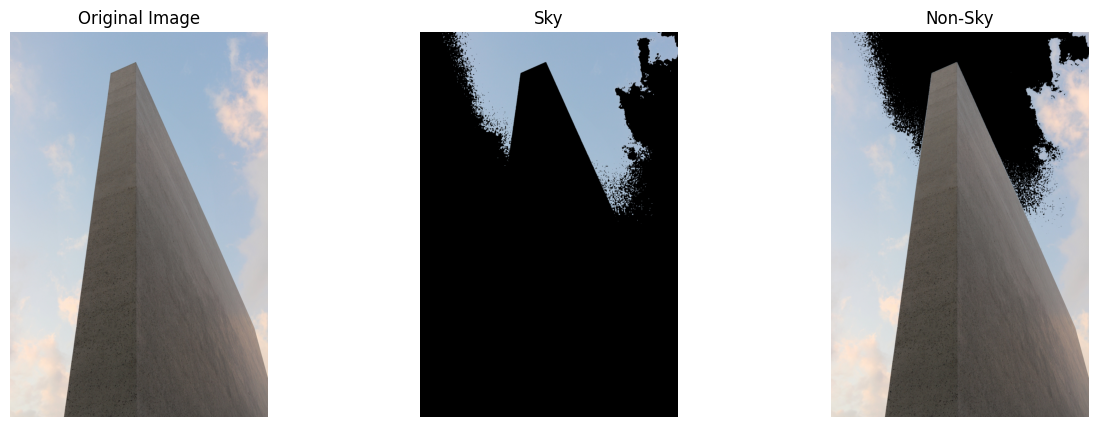

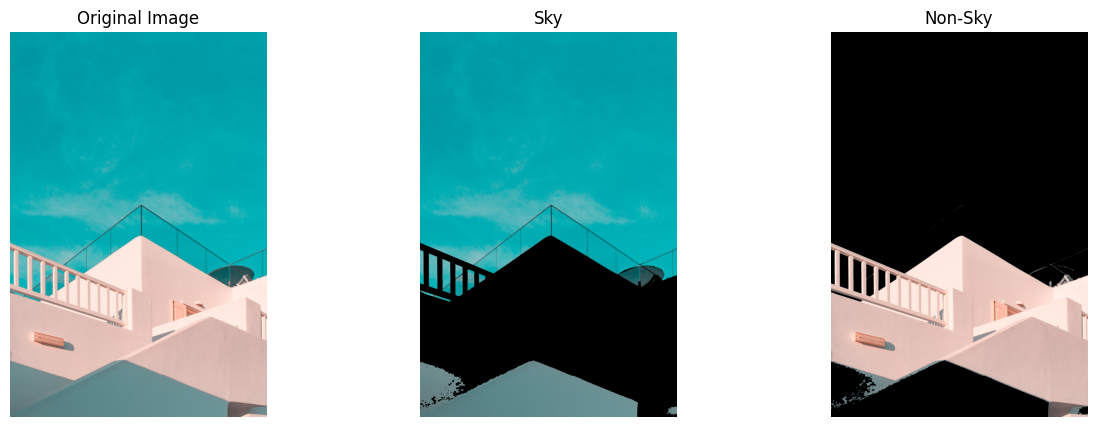

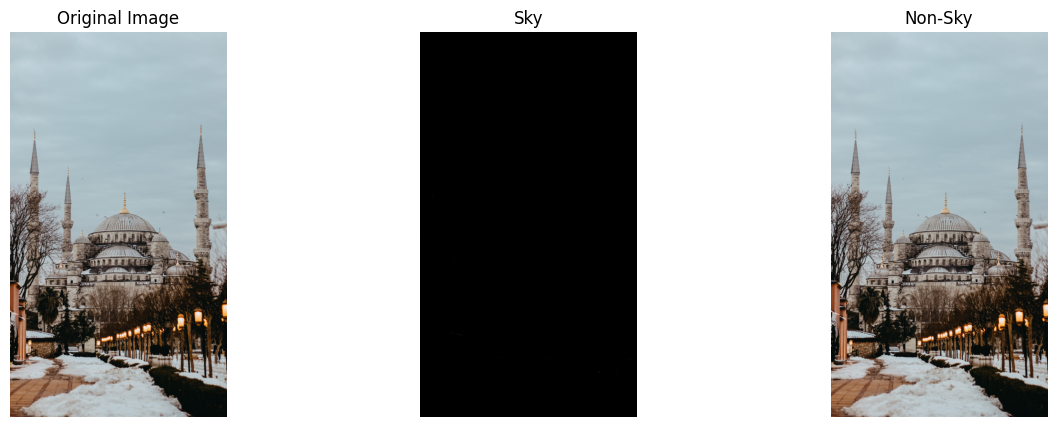

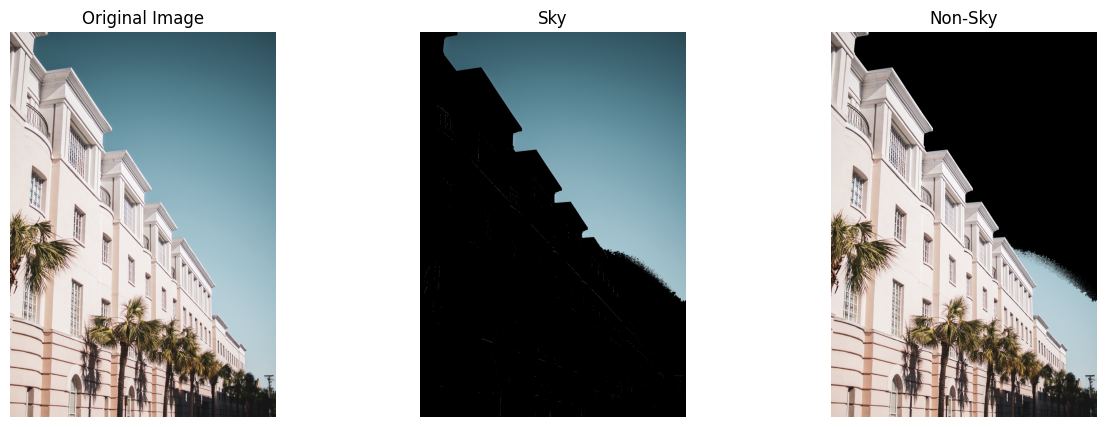

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Function to calculate skyline
def cal_skyline(mask):
    h, w = mask.shape
    for i in range(w):
        raw = mask[:, i]
        after_median = medfilt(raw, 19)
        try:
            first_zero_index = np.where(after_median == 0)[0][0]
            first_one_index = np.where(after_median == 1)[0][0]
            if first_zero_index > 20:
                mask[first_one_index:first_zero_index, i] = 1
                mask[first_zero_index:, i] = 0
                mask[:first_one_index, i] = 0
        except:
            continue
    return mask

# Function to process the image
def process_image(image_path):
    # Load the original image
    original_image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Define multiple ranges of colors for the sky
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    lower_light_blue = np.array([70, 50, 50])
    upper_light_blue = np.array([100, 255, 255])

    lower_pink = np.array([140, 50, 50])
    upper_pink = np.array([170, 255, 255])

    # Create masks for different sky colors
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_light_blue = cv2.inRange(hsv, lower_light_blue, upper_light_blue)
    mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)

    # Combine masks to capture different shades of the sky
    combined_mask = cv2.bitwise_or(mask_blue, mask_light_blue)
    combined_mask = cv2.bitwise_or(combined_mask, mask_pink)

    # Apply the combined mask to the original image
    sky = cv2.bitwise_and(original_image, original_image, mask=combined_mask)

    # Invert the mask to get the non-sky part
    mask_inv = cv2.bitwise_not(combined_mask)
    non_sky = cv2.bitwise_and(original_image, original_image, mask=mask_inv)

    # Apply median filter to the sky region
    sky = cv2.medianBlur(sky, 5)  # Adjust the kernel size (5 in this case) as needed

    # Calculate skyline
    mask = cal_skyline(combined_mask)

    return original_image, sky, non_sky

# Function to plot images
def plot_images(original_image, sky, non_sky):
    # Plot the original image along with the separated sky and non-sky parts
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(sky, cv2.COLOR_BGR2RGB))
    plt.title('Sky')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(non_sky, cv2.COLOR_BGR2RGB))
    plt.title('Non-Sky')
    plt.axis('off')

    plt.show()

# Main function
def main(image_paths):
    for image_path in image_paths:
        original_image, sky, non_sky = process_image(image_path)
        plot_images(original_image, sky, non_sky)

if __name__ == "__main__":
    image_paths = [f"/content/sky_image{i}.jpg" for i in range(1, 21)]
    main(image_paths)
